# 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("./data/penguins.csv")

In [3]:
X = df.drop("body_mass_g", axis = 1)
y = df["body_mass_g"]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

In [4]:
df = df.dropna(subset="body_mass_g")

In [5]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 결측치 처리

In [6]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

부리의 길이가 길고 두께가 두꺼우면 수컷이고 작으면 암컷인 경우가 많다는 점을 이용해 부리 길이로 기준 삼아 sex의 결측치를 처리

In [7]:
df[df["sex"].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [8]:
df[df["species"] == "Gentoo"].groupby("sex")["culmen_length_mm"].mean().mean()

46.51252119841718

In [9]:
# Gentoo 종 성별 결측치 처리

df.loc[(df["sex"].isna()) & (df["species"] == "Gentoo") & (df["culmen_length_mm"] < 46.5), "sex"] = "FEMALE"

df.loc[(df["sex"].isna()) & (df["species"] == "Gentoo") & (df["culmen_length_mm"] > 46.5), "sex"] = "MALE"

In [10]:
df[df["species"] == "Adelie"].groupby("sex")["culmen_length_mm"].mean().mean()

38.82397260273973

In [11]:
# Adelie 종 성별 결측치 처리

df.loc[(df["sex"].isna()) & (df["species"] == "Adelie") & (df["culmen_length_mm"] < 38.8), "sex"] = "FEMALE"

df.loc[(df["sex"].isna()) & (df["species"] == "Adelie") & (df["culmen_length_mm"] > 38.8), "sex"] = "MALE"

데이터 sex컬럼에 .이라는 값이 찍혀있는 걸 확인해 처리

In [12]:
df.loc[336, "sex"] = "FEMALE"

In [13]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [14]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# EDA

In [15]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [16]:
spe = df["species"].unique()
isl = df["island"].unique()

print(f"species : {spe}\nisland : {isl}")

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Torgersen' 'Biscoe' 'Dream']


## 서식지 별 종 개체수

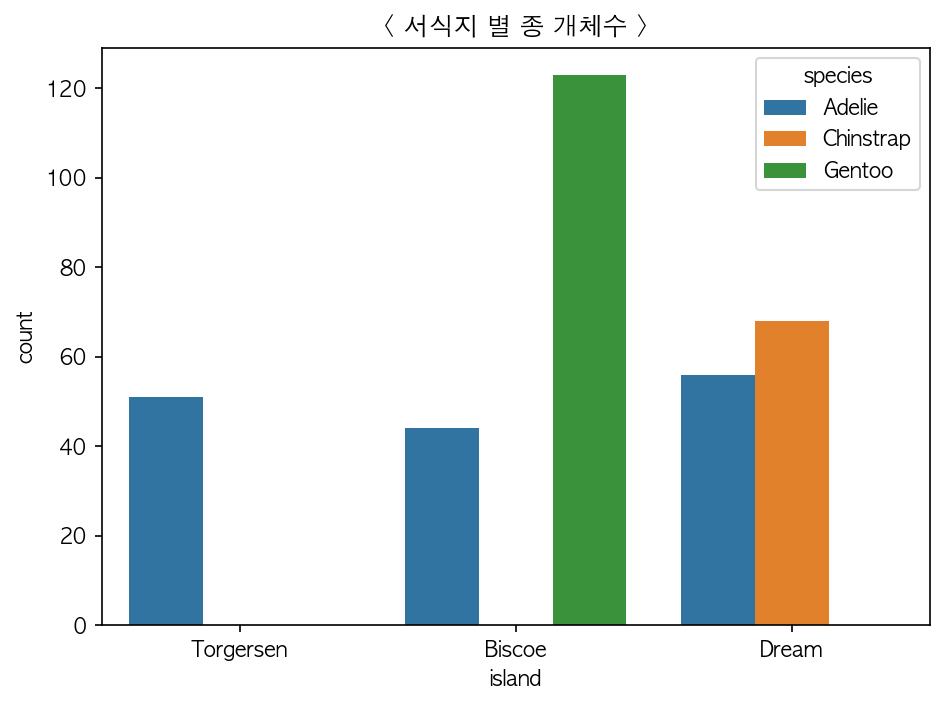

In [17]:
sns.countplot(data = df, x = "island", hue = "species")
plt.title("< 서식지 별 종 개체수 >")
plt.tight_layout()

## 데이터 펭귄 종 비율 확인

In [18]:
species = df.groupby("species")["body_mass_g"].count()

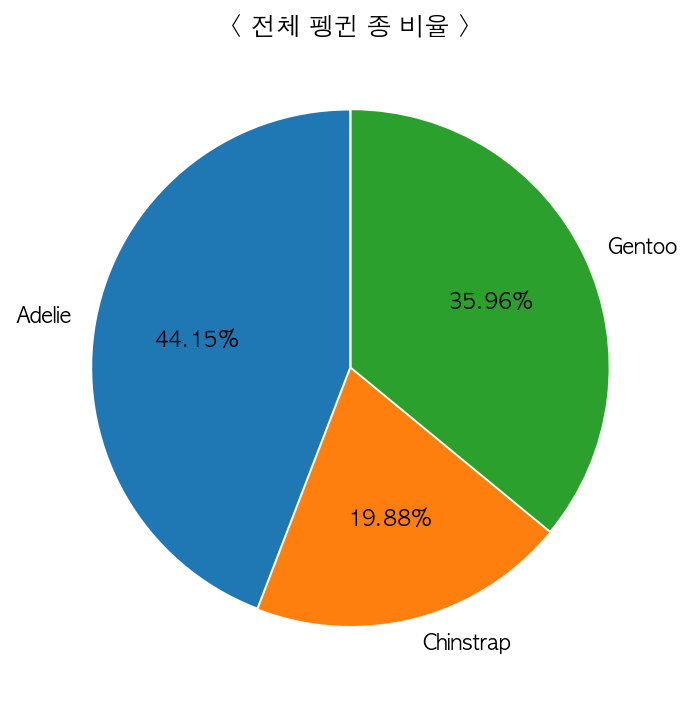

In [19]:
_ = plt.pie(
    species,
    labels = df["species"].unique(),
    startangle = 90,
    explode = (0.005, 0.005, 0.005),
    autopct = "%.2f%%"
)
plt.title("< 전체 펭귄 종 비율 >")
plt.tight_layout()

## 종 별 평균 몸무게

In [20]:
target_columns = ["body_mass_g", "flipper_length_mm", "culmen_length_mm", "culmen_depth_mm"]

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1699/898789966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df.groupby("species")[target].mean(),
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1699/898789966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df.groupby("species")[target].mean(),
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1699/898789966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df.groupby("species")[target].mean(),
/var/folders/99/kvxjdlbx2fv46xhlz0

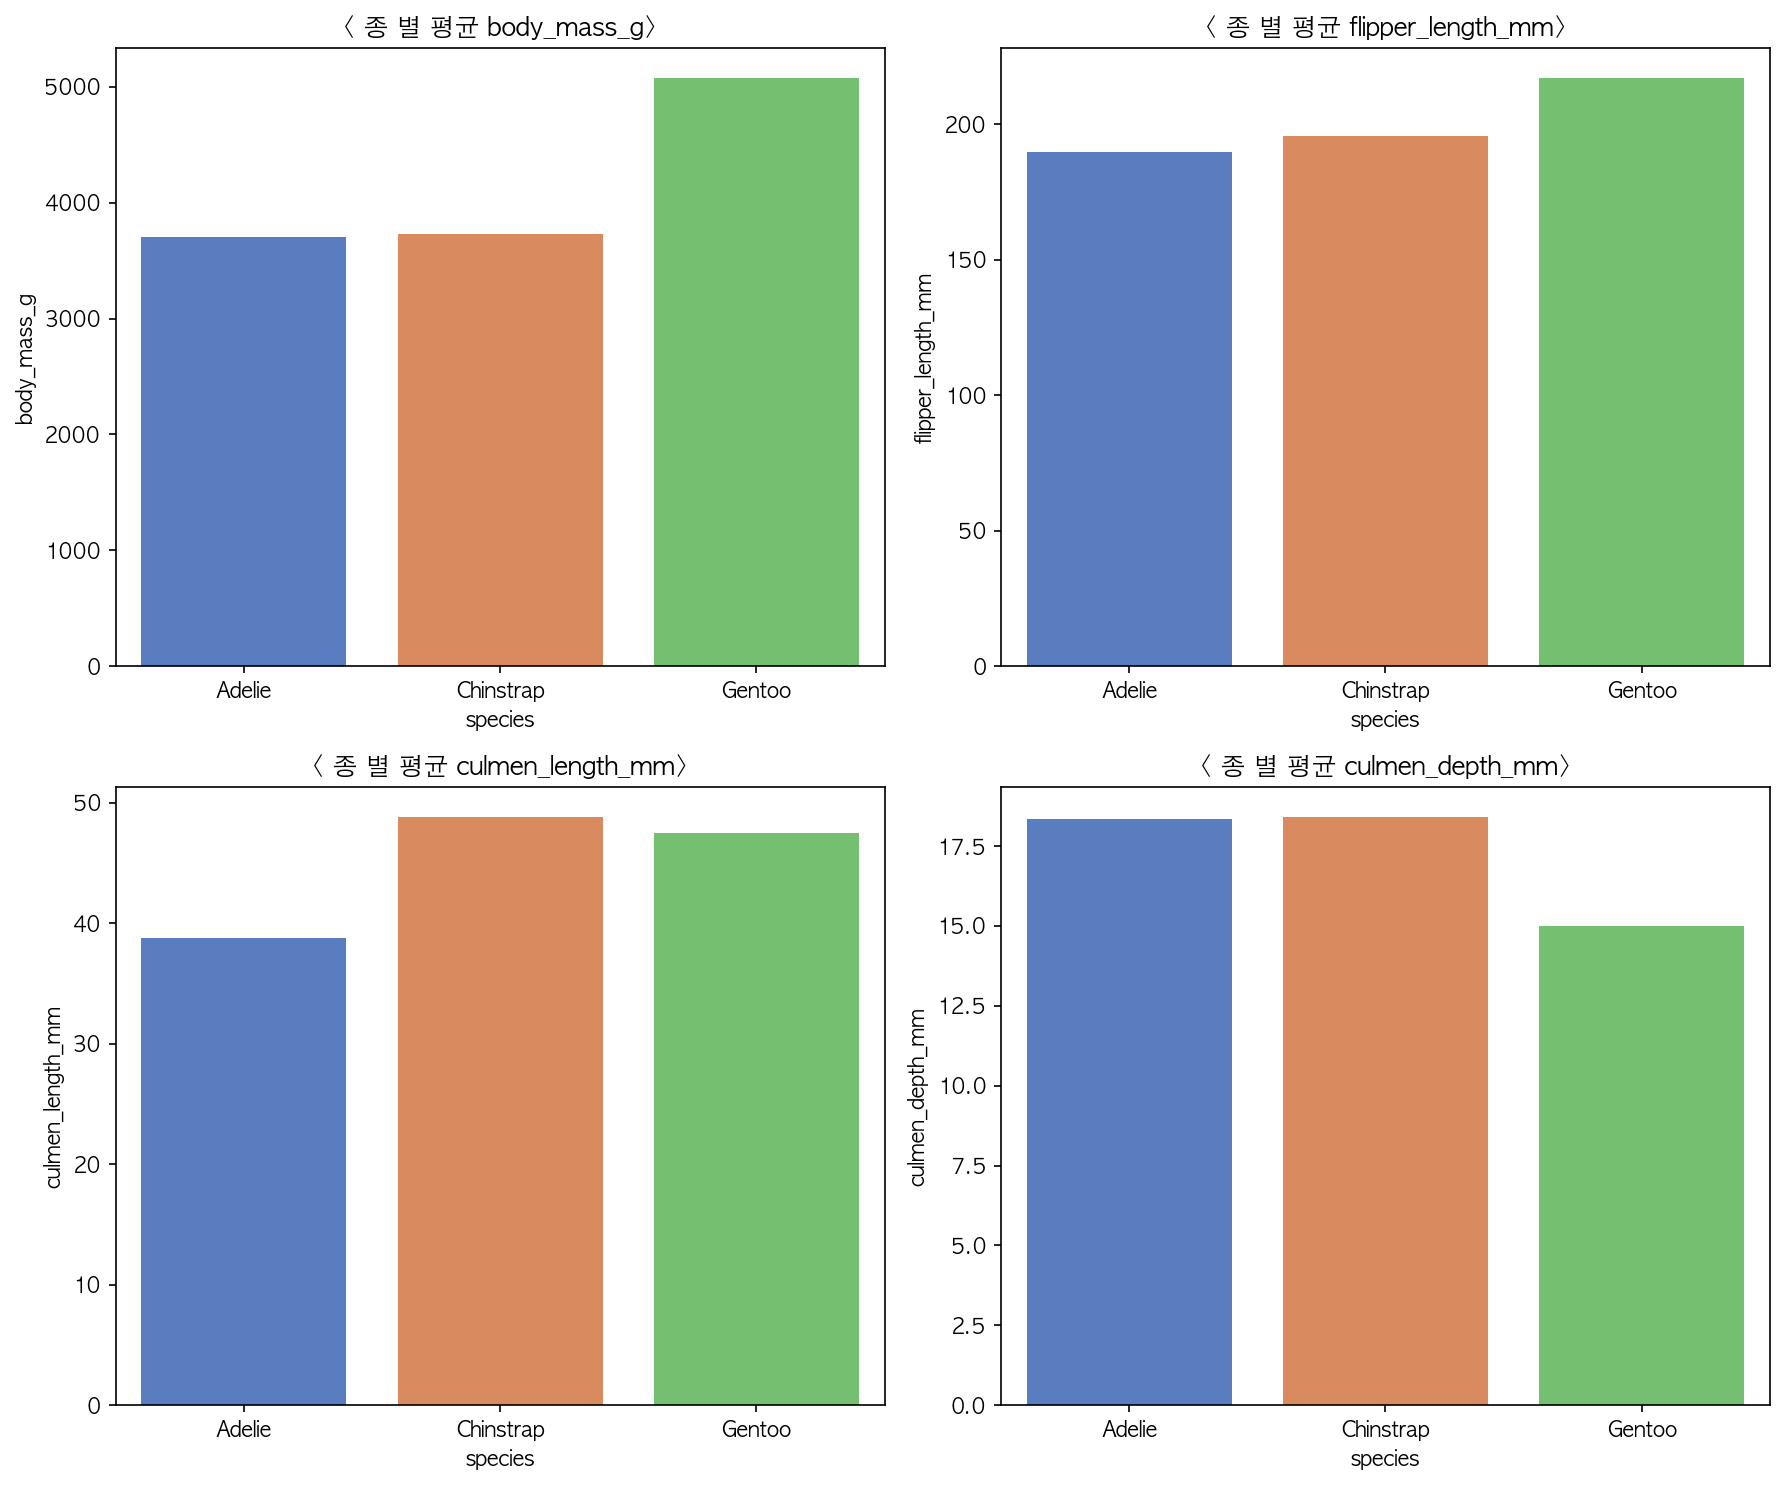

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, target in enumerate(target_columns):
    row = i // 2
    col = i % 2
    sns.barplot(data = df.groupby("species")[target].mean(),
                palette = "muted",
                ax = axs[row, col])
    axs[row, col].set_title(f"< 종 별 평균 {target}>")

plt.tight_layout()

In [22]:
df[df["species"] == "Adelie"]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


## 상관관계 확인

In [23]:
df.corr(numeric_only = True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

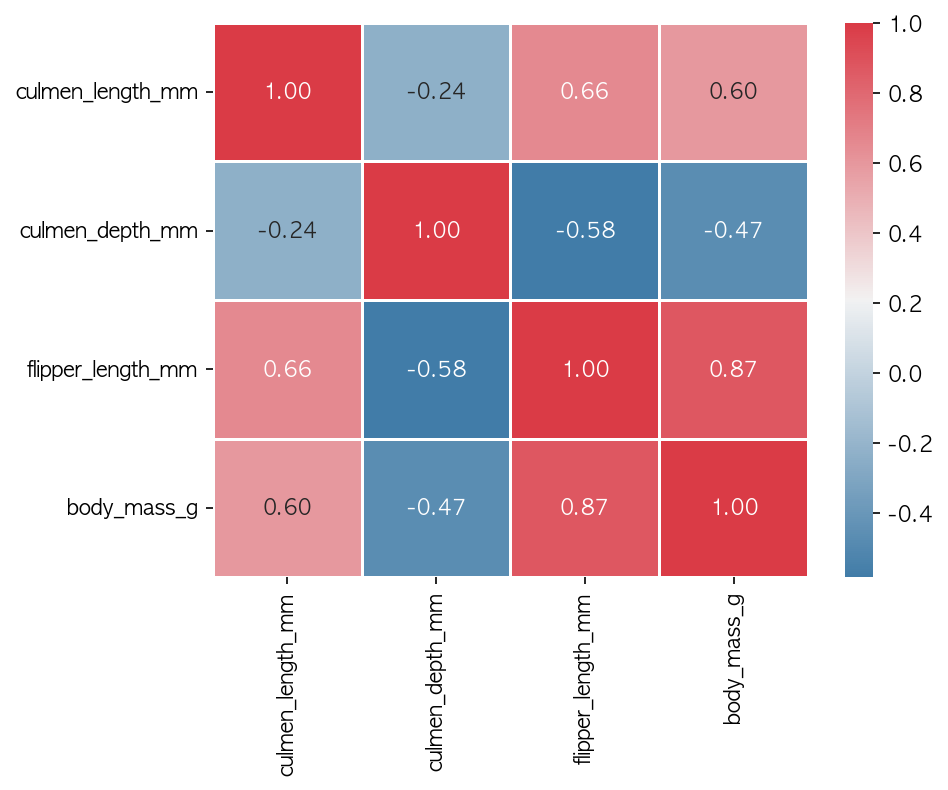

In [24]:
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

sns.heatmap(
    df.corr(numeric_only = True),
    annot=True, 
    fmt=".2f",
    linewidths=.5,
    cmap = cmap
)

# ANOVA로 서식지별로 펭귄들의 몸무게가 같은지 다른지 검정

<Axes: xlabel='island', ylabel='body_mass_g'>

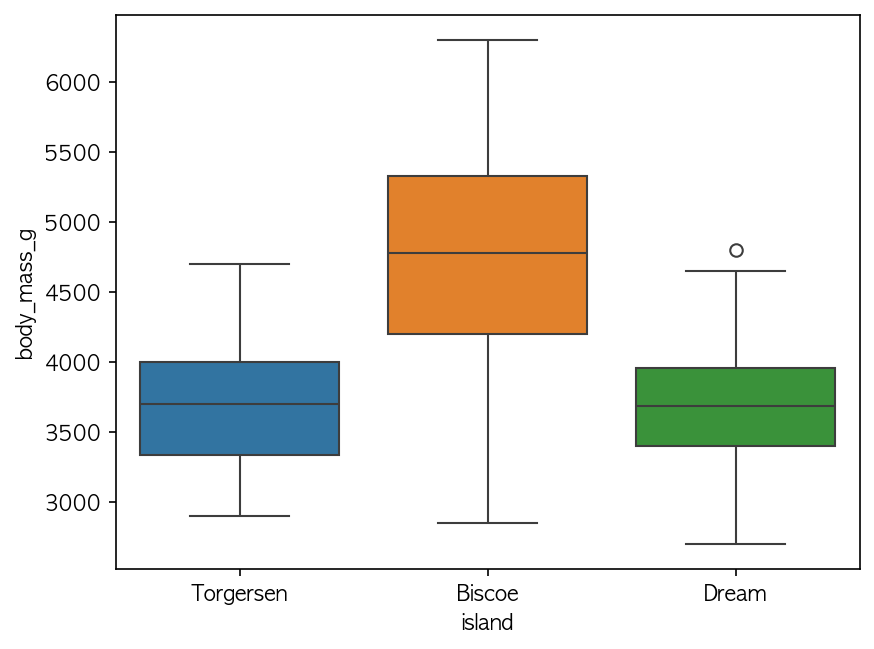

In [25]:
# boxplot을 그려서 시각화

sns.boxplot(
    data = df,
    x = "island",
    y = "body_mass_g",
    hue = "island",
    legend = False
)

$$H_{0}: \mu_{1}=\mu_{2}=...=\mu_{k}$$   <center>(모든 서식지 펭귄들이 평균 몸무게가 같다)</center>   
$$H_{a}: \mu_{i}\neq\mu_{j}\;for\;some\;i,j$$   <center>(적어도 한 서식지에서 펭귄들의 평균 몸무게는 다르다)</center>

In [26]:
from scipy.stats import f_oneway

groups = []

islands = df["island"].unique()

for island in islands:
    groups.append(df[df["island"] == island]["body_mass_g"])

In [27]:
f_statistic, p_value = f_oneway(*groups)

In [28]:
print("F-statistic:", f_statistic)
print("p-value:", p_value)
print("귀무 가설 기각 여부:", p_value<0.05)

F-statistic: 110.00796506232126
p-value: 1.515129142401513e-37
귀무 가설 기각 여부: True


In [29]:
from scipy.stats import tukey_hsd

result = tukey_hsd(*groups)
result.pvalue

array([[1.00000000e+00, 1.44328993e-14, 9.97836412e-01],
       [1.44328993e-14, 1.00000000e+00, 1.44328993e-14],
       [9.97836412e-01, 1.44328993e-14, 1.00000000e+00]])

In [30]:
pvalue_table = pd.DataFrame(result.pvalue, columns=islands, index=islands)
pvalue_table

,Torgersen,Biscoe,Dream
Torgersen,1.000000e+00,1.443290e-14,9.978364e-01
Biscoe,1.443290e-14,1.000000e+00,1.443290e-14
Dream,9.978364e-01,1.443290e-14,1.000000e+00


<Axes: >

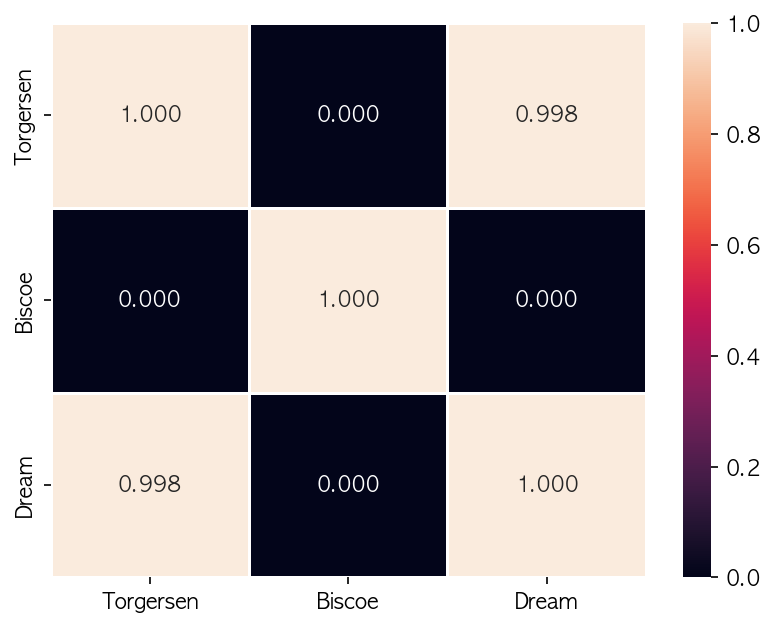

In [31]:
sns.heatmap(
    pvalue_table,
    annot=True,
    fmt=".3f",
    linewidth=0.5,
)

**Biscoe island의 평균이 유의미하게 다른 것을 ANOVA를 통해 확인할 수 있었습니다.**

# 데이터 인코딩

In [32]:
# 성별 Label encoding

label_encoder = LabelEncoder()
df["is_male"] = label_encoder.fit_transform(df["sex"])

In [33]:
# 종, 서식지 One-Hot encoding

island_dummies = pd.get_dummies(
    df["island"],
    prefix = "island",
    dtype = int
)

species_dummies = pd.get_dummies(
    df["species"],
    dtype = int
)

In [34]:
df = pd.concat([df, island_dummies, species_dummies], axis = 1)

In [35]:
df.drop(["species", "island", "sex"], axis = 1, inplace = True)

In [38]:
df

,Adelie,Chinstrap,Gentoo,island_Biscoe,island_Dream,island_Torgersen,is_male,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1,0,0,0,0,1,1,39.1,18.7,181.0,3750.0
1,1,0,0,0,0,1,0,39.5,17.4,186.0,3800.0
2,1,0,0,0,0,1,0,40.3,18.0,195.0,3250.0
4,1,0,0,0,0,1,0,36.7,19.3,193.0,3450.0
5,1,0,0,0,0,1,1,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...,...,...,...,...,...
338,0,0,1,1,0,0,0,47.2,13.7,214.0,4925.0
340,0,0,1,1,0,0,0,46.8,14.3,215.0,4850.0
341,0,0,1,1,0,0,1,50.4,15.7,222.0,5750.0
342,0,0,1,1,0,0,0,45.2,14.8,212.0,5200.0


# 전처리 데이터 내보내기

In [36]:
df = df[["Adelie", "Chinstrap", "Gentoo", "island_Biscoe", "island_Dream", "island_Torgersen", "is_male",
"culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]

In [37]:
df.to_csv("./data/preprocessed_penguins.csv", index = False, encoding = "utf-8")